<a href="https://colab.research.google.com/github/AlexKressner/Industrielles_Management/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Machine Learning: Regression, Beispiel Immobilienpreise

## 1.1 Daten laden

In [32]:
import pandas as pd

In [33]:
! git clone https://github.com/AlexKressner/Industrielles_Management

fatal: destination path 'Industrielles_Management' already exists and is not an empty directory.


In [34]:
path = "Industrielles_Management/Daten/Intro_ML/"

In [35]:
# Datentypen für das Laden der Daten definieren
# Beispiel: Zwar handelt es sich beim Baujahr um eine Zahl, allerdings interessiert uns
# hier nur, ob eine Immobilie in einem Jahr gebaut wurde oder eben nicht.
dtypes = {
    "Verkaufsmonat": "str",
    "Baujahr": "str",
}

In [36]:
# Relevante Spalten definiere
cols = [
    "Verkaufspreis","Verkaufsmonat","Wohnraum_qm",
    "Keller_qm", "Grundstueck_qm","Baujahr"
    ]

In [37]:
# Daten laden
data = pd.read_csv(f"{path}house_price.txt", dtype=dtypes, usecols=cols)

In [38]:
data.dtypes

Verkaufspreis       int64
Verkaufsmonat      object
Wohnraum_qm       float64
Keller_qm         float64
Grundstueck_qm    float64
Baujahr            object
dtype: object

## 1.2 Erster Überblick zum Datensatz

In [39]:
# Kopfzeile der Daten
data.head()

,Verkaufspreis,Verkaufsmonat,Wohnraum_qm,Keller_qm,Grundstueck_qm,Baujahr
0,208500,2,521.341463,260.975610,2576.219512,2003
1,181500,5,384.756098,384.756098,2926.829268,1976
2,223500,9,544.512195,280.487805,3429.878049,2001
3,140000,2,523.475610,230.487805,2911.585366,1915
4,250000,12,670.121951,349.085366,4347.560976,2000


In [40]:
# Größe des Datensatzes
data.shape

(1460, 6)

## 1.3 Vorgehensmodell zum Training eines ML-Modells
Bitte vergleichen Sie dazu die Ausführungen in der Vorlesungsunterlage!
Ziel ist es, ein Prognosemodell zu entwickeln, welches den realisierbaren Verkaufspreis einer Immobilie basierend auf den Eigenschaften einer Immobilie (Wohnraum, Grundstück, Baujahr, etc.) bestimmt. Nach dem Training eines solchen Modells können wir für beliebige Immobilien Prognosen zum Verkaufspreis machen, wenn wir deren Eigenschaften kennen.

### 1.3.1 Datensatz in Features und Target teilen
Zunächst einmal müssen wir unterscheiden, was vorhergesagt werden soll (**Target**) und welche Merkmale dazu genutzt werden sollen (**Features**).

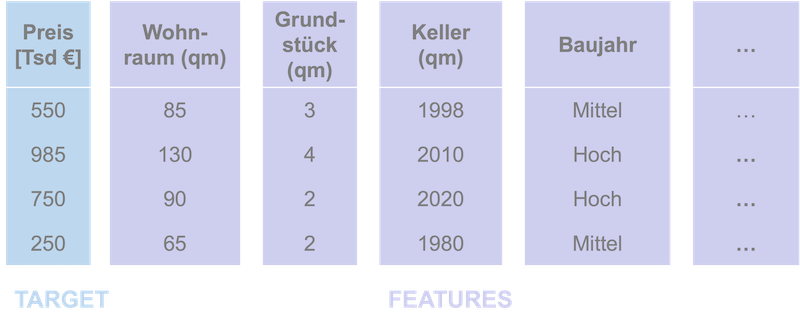

In [42]:
# Features, d.h. womit lässt sich der Immobilienpreis vorhersagen!
X = data.drop(columns="Verkaufspreis")
X.head()

,Verkaufsmonat,Wohnraum_qm,Keller_qm,Grundstueck_qm,Baujahr
0,2,521.341463,260.975610,2576.219512,2003
1,5,384.756098,384.756098,2926.829268,1976
2,9,544.512195,280.487805,3429.878049,2001
3,2,523.475610,230.487805,2911.585366,1915
4,12,670.121951,349.085366,4347.560976,2000


In [43]:
# Target, d.h. was soll prognostiziert werden!
y = data["Verkaufspreis"]
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: Verkaufspreis, dtype: int64

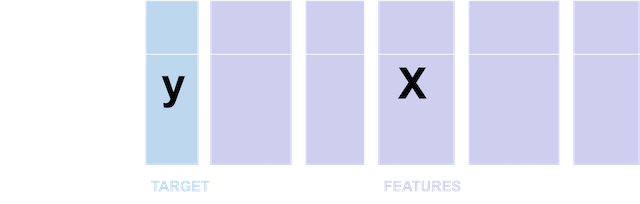

In [44]:
X.shape, y.shape

((1460, 5), (1460,))

### 1.3.2 Datensatz in Trainings- und Testmenge aufteilen

Bevor wir gleich zu der Aufteilung in Trainings- & Testdaten zum Training des ML-Verfahrens kommen, müssen die nicht-numerischen Daten passend aufbereitet werden. Das Vorgehen ist dabei immer gleich. Zur Illustration nutzen wir die  die ersten 5 Eintragungen in der Spalte `Verkaufsmonat`.

In [45]:
example = data["Verkaufsmonat"].head()
example

0     2
1     5
2     9
3     2
4    12
Name: Verkaufsmonat, dtype: object

Wie Ihnen bekannt, enthält die Spalte die jeweilige Heimmannschaft eines Spiels. Wenn wir mit dem Package `sklearn` und den darin verfügbaren ML-Algorithmen arbeiten, müssen wir die Datenstrutkur umwandeln. Dazu nutzen wir die Funktion `get_dummies` wie in der unteren Codezeile dargestellt.

In [46]:
pd.get_dummies(example)

,12,2,5,9
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,1,0,0,0


Wir können die Funktion `get_dummies` auf den gesamten Datensatz anwenden und Pandas sucht sich selbst die umzuwandelnden Spalten.



In [47]:
X = pd.get_dummies(X)
X.head()

,Wohnraum_qm,Keller_qm,Grundstueck_qm,Verkaufsmonat_1,Verkaufsmonat_10,Verkaufsmonat_11,Verkaufsmonat_12,Verkaufsmonat_2,Verkaufsmonat_3,Verkaufsmonat_4,...,Baujahr_2001,Baujahr_2002,Baujahr_2003,Baujahr_2004,Baujahr_2005,Baujahr_2006,Baujahr_2007,Baujahr_2008,Baujahr_2009,Baujahr_2010
0,521.341463,260.975610,2576.219512,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,384.756098,384.756098,2926.829268,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,544.512195,280.487805,3429.878049,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,523.475610,230.487805,2911.585366,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,670.121951,349.085366,4347.560976,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Bei der Aufteilung der Daten in Test- und Trainingsmenge hilft die Funktion `train_test_split`.

In [48]:
from sklearn.model_selection import train_test_split

In [17]:
# Training Algorithmus: X_train (Features), y_train (Target)
# Test des Algorithmus (Bewertung): X_test, y_test
#     1) Algorithmus bekommt Daten (X_test), die er noch nicht kennt & macht Prognose
#     2) Vergleich Prognose mit tatsächlichen Werte (y_test) --> Bewertung

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

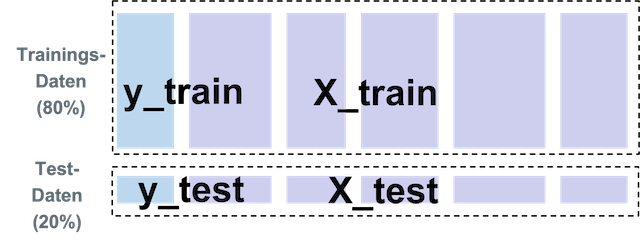

**Trainingsdaten:** Das jeweilige ML-Verfahren kennt `y_train` (Target, d.h. Immobilienpreis) und `X_train` (Features, d.h. die zugehörigen Merkmale der Immobilie) und versucht einen Zusammenhang zwischen diesen zu lernen!

In [49]:
y_train.head()

727     194500
328     214500
958     185000
126     128000
1102    135000
Name: Verkaufspreis, dtype: int64

In [50]:
X_train.head()

,Wohnraum_qm,Keller_qm,Grundstueck_qm,Verkaufsmonat_1,Verkaufsmonat_10,Verkaufsmonat_11,Verkaufsmonat_12,Verkaufsmonat_2,Verkaufsmonat_3,Verkaufsmonat_4,...,Baujahr_2001,Baujahr_2002,Baujahr_2003,Baujahr_2004,Baujahr_2005,Baujahr_2006,Baujahr_2007,Baujahr_2008,Baujahr_2009,Baujahr_2010
727,375.609756,375.609756,2229.878049,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
328,650.609756,257.317073,3624.390244,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
958,407.621951,407.621951,2576.219512,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
126,292.073171,328.658537,1502.439024,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1102,345.731707,307.926829,2134.146341,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### 1.3.3 Modell auswählen

Für Regressions- und Klassifikationsprobleme gibt es eine Unmenge an ML-Verfahren. Eine Übersicht finden Sie [hier](https://scikit-learn.org/stable/). Wir werden das Verfahren `Random Forest` verwenden. Es gehört zu den besten und robustestens Verfahren im Bereich Machine Learning und wird aus diesem Grund häufig in der Praxis eingesetzt.

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
model = RandomForestRegressor()

### 1.3.4 Modell trainieren

Das Random Forest Verfahren versucht nun einen Zusammenhang zwischen den Features und dem Target zu lernen und minimiert dabei ein Fehlermaß. In der Grundeinstellung wird die Summe der quadrierten Fehler minimiert, d.h. $∑(y_i - \hat{y}_i)^2$ mit $y=$Preis Immobilie $i$ und $\hat{y}=$Prognose Preis Immobilie $i$.

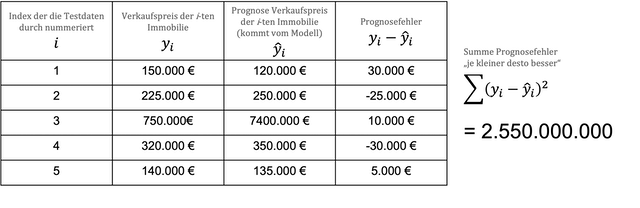

**Frage**: Was ist der mittlere Fehler in Euro, der im obigen Beispiel gemacht wird?

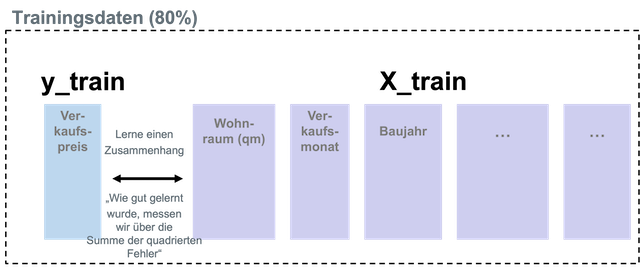

In [53]:
model.fit(X_train, y_train)

RandomForestRegressor()

### 1.3.5 Modell anwenden

Zu diesem Zweck nutzen wir nun die **Testdaten**. Das ML-Verfahren erhält die Daten `X_test`, d.h. die Merkmale einer Immobilie und wendet die gelernten Zusammenhänge zur Prognose des Targets an!

In [54]:
X_test.head()

,Wohnraum_qm,Keller_qm,Grundstueck_qm,Verkaufsmonat_1,Verkaufsmonat_10,Verkaufsmonat_11,Verkaufsmonat_12,Verkaufsmonat_2,Verkaufsmonat_3,Verkaufsmonat_4,...,Baujahr_2001,Baujahr_2002,Baujahr_2003,Baujahr_2004,Baujahr_2005,Baujahr_2006,Baujahr_2007,Baujahr_2008,Baujahr_2009,Baujahr_2010
140,263.414634,263.414634,3201.219512,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
950,263.414634,263.414634,2195.121951,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,508.536585,256.097561,3450.304878,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1360,792.987805,186.585366,3000.609756,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
568,650.000000,456.097561,3758.231707,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y_pred = model.predict(X_test)
y_pred[:10]

array([111359.5       , 124585.        , 194413.        , 195437.26      ,
       257926.03      , 117551.48333333, 164448.05      , 160619.13      ,
       149885.5       , 111469.49      ])

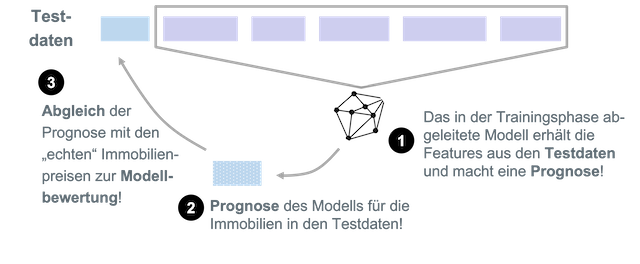

### 1.3.6 Modell evaluieren

Nachdem nun Prognosewerte durch das angelernte Verfahren berechnet wurden, können wir diese mit den tatsächlichen Werten des Target, also den tatsächlichen Immobilienpreisen vergleichen (`y_test`). Daraus können wir dann die Güte eines Verfahrens ableiten!

In [56]:
import sklearn.metrics
import matplotlib.pyplot as plt

In [57]:
# Genauigkeit des Modells auf der Testmenge, mittlerer absoluter Fehler
sklearn.metrics.mean_absolute_error(y_test, y_pred)

31669.02093933464

In [58]:
# Genauigkeit des Modells auf der Testmenge, mittlerer absoluter prozentualer Fehler
sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)

0.18574519188001454

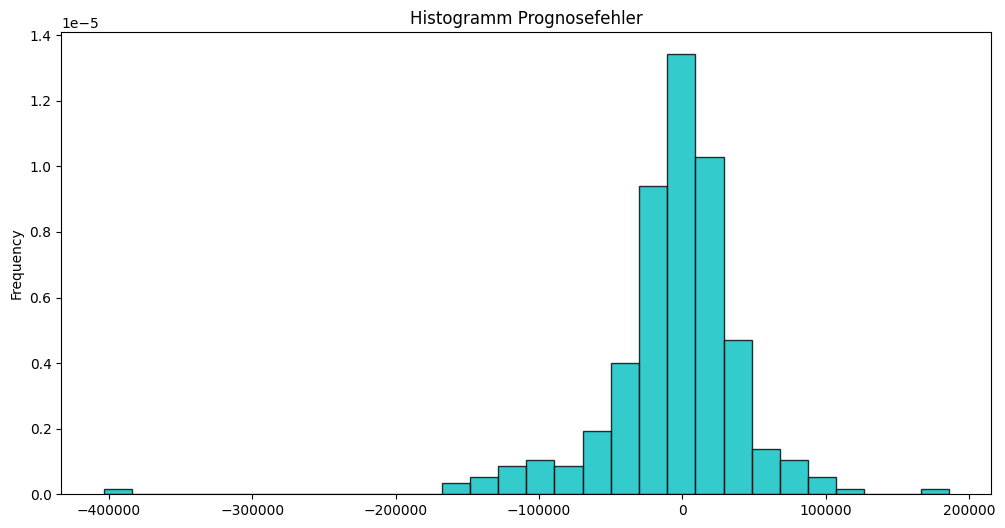

In [59]:
(y_test - y_pred).plot(
    kind="hist",
    title= "Histogramm Prognosefehler",
    figsize=(12,6),
    color="c",
    edgecolor='k',
    density=True,
    alpha=0.8,
    bins=30
    )
plt.show()

### 1.3.7 Modell anwenden

In [61]:
immobilie = X_test.head(1).copy()

In [68]:
immobilie["Wohnraum_qm"]= 100
immobilie["Keller_qm"]= 50
immobilie["Grundstueck_qm"]= 100
immobilie["Verkaufsmonat_4"]= 1
immobilie["Verkaufsmonat_6"]= 0

In [69]:
immobilie

,Wohnraum_qm,Keller_qm,Grundstueck_qm,Verkaufsmonat_1,Verkaufsmonat_10,Verkaufsmonat_11,Verkaufsmonat_12,Verkaufsmonat_2,Verkaufsmonat_3,Verkaufsmonat_4,...,Baujahr_2001,Baujahr_2002,Baujahr_2003,Baujahr_2004,Baujahr_2005,Baujahr_2006,Baujahr_2007,Baujahr_2008,Baujahr_2009,Baujahr_2010
140,100,50,100,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
model.predict(immobilie)

array([50935.31])

# 2 Übungsaufgabe
Der Online Autohändler AutoStar plant seinen Marketing-Mix, d.h. wie viel Geld soll in die verschiedenen Marketingkanäle "TV", "Radio", "Social Media" und "Influencer" investiert werden. Aus der Vergangenheit liegen Daten vor, die das investierte Geld in die Marketingkanäle sowie den erzielten Umsatz wiedergeben. Es ist nun Ihre Aufgabe ein Modell zu entwickeln, welches den Umsatz in Abhängigkeit der eingesetzten Mittel für die verschiedenen Marketingkanäle (TV, Radio, Social Media & Influencer) prognostizert. Das Modell soll dabei helfen, den optimalen Marketing-Mix zu planen. Die relevanten Daten finden Sie in der Datei `advertising_and_sales.txt`.

In [88]:
data = pd.read_csv(f"{path}advertising_and_sales.txt")

In [89]:
data.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [90]:
TARGET = "sales"

In [91]:
X = data.drop(columns=TARGET)
y = data[TARGET]

In [92]:
X = pd.get_dummies(X)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [95]:
model = RandomForestRegressor()

In [96]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [97]:
y_pred = model.predict(X_test)

In [100]:
X_test.head(5)

,tv,radio,social_media,influencer_Macro,influencer_Mega,influencer_Micro,influencer_Nano
2155,21000.0,6824.10,3386.31,0,1,0,0
1729,84000.0,29138.07,4477.79,0,1,0,0
2800,68000.0,20857.48,5305.81,0,0,0,1
1637,96000.0,32576.33,4849.64,0,0,0,1
272,77000.0,25583.44,3870.99,1,0,0,0


In [99]:
y_pred[:5]

array([ 74437.457 , 299063.8034, 242161.2456, 343589.0059, 275052.9373])

In [102]:
sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)*100

1.9828204233832876

In [103]:
kampagne = X_test.head(1)

In [107]:
kampagne["tv"]=300000
kampagne["social_media"]=20000

<ipython-input-107-ae7bc4dbfcae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kampagne["tv"]=300000
<ipython-input-107-ae7bc4dbfcae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kampagne["social_media"]=20000


In [108]:
kampagne

,tv,radio,social_media,influencer_Macro,influencer_Mega,influencer_Micro,influencer_Nano
2155,300000,6824.1,20000,0,1,0,0


In [109]:
model.predict(kampagne)

array([356599.0795])